In [38]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\proto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\proto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\proto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [39]:
corpus_oanc = PlaintextCorpusReader('./OANC-GrAF', '.*\.txt')

In [47]:
punct = re.compile('[^\w]+', re.IGNORECASE)
filtered_words_iterable = filter(lambda token: not punct.match(token) and token not in stopwords.words('english'), corpus_oanc.words())

In [71]:
freq = nltk.FreqDist(corpus_oanc.words())

In [72]:
def clean_freq(freq: nltk.FreqDist):
    punct = re.compile('[^\w]+', re.IGNORECASE)
    lemmatizer = nltk.WordNetLemmatizer()
    to_remove = []
    words = list(freq.keys())
    for word in words:
        if punct.match(word) or word in stopwords.words('english'):
            to_remove.append(word)
            continue
        clean_word = lemmatizer.lemmatize(word.lower())
        if word != clean_word:
            if clean_word in freq.keys():
                freq[clean_word] += freq[word]
            else:
                freq[clean_word] = freq[word]
            to_remove.append(word)
    for word in to_remove:
        freq.pop(word, None)


In [73]:
print(freq.keys())
clean_freq(freq)
print(freq.keys())

dict_keys(['All', 'right', ',', 'this', 'is', 'Elissa', 'Adams', 'and', 'you', "'", 've', 'lived', 'in', 'Charlotte', 'for', '--', 'Five', 'years', '.', 'OK', 'Um', 'First', 'thing', 'I', 'want', 'to', 'ask', 'if', 'remember', 'any', 'books', 'that', 'read', 'as', 'a', 'child', 'um', 'or', 'either', 'were', 'by', 'teacher', 'your', 'parents', 'grandparents', 'really', 'enjoying', 'Is', 'there', 'anything', 'particular', 'comes', 'mind', '?', 'No', 'Nothing', 'How', 'about', 'stories', 'uh', 'didn', 't', 'weren', 'but', 'know', 'how', 'people', 'come', 'up', 'with', 'mean', 'told', 'liked', 'hearing', 'when', 'growing', 'Not', 'can', 'no', 'school', 'Everybody', 'has', 'stuff', 'Do', 'are', 'always', 'had', 'everything', 'certain', 'things', 'more', 'than', 'others', 'do', 'maybe', 'English', 'class', 'like', 're', 'recall', 'Well', 'what', 'now', 'Thanksgiving', 's', 'coming', 'families', 'get', 'together', 'Christmas', 'eating', 'dinner', 'just', 'talking', 'Are', 'family', 'might', '

In [77]:
lemmatizer = nltk.WordNetLemmatizer()
lemmatizer.lemmatize('wrote')

'wrote'

C:\Users\proto\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 2062 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\proto\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\proto\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36920 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\proto\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\proto\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36005 missing from current font.
  font.set_text(s,

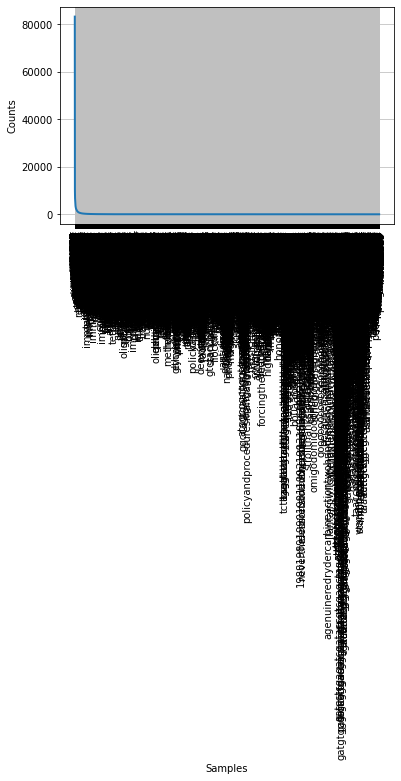

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [81]:
freq.plot()

In [117]:
freq.most_common(100)

[('uh', 83183),
 ('know', 52850),
 ('yeah', 46029),
 ('one', 43266),
 ('um', 37212),
 ('like', 36065),
 ('well', 32606),
 ('time', 32401),
 ('1', 30724),
 ('would', 27194),
 ('2', 25532),
 ('year', 25194),
 ('think', 24006),
 ('right', 23130),
 ('cell', 22047),
 ('new', 21787),
 ('also', 21454),
 ('two', 20940),
 ('get', 19371),
 ('people', 19125),
 ('oh', 18910),
 ('huh', 17860),
 ('really', 17667),
 ('gene', 17343),
 ('see', 17120),
 ('may', 16962),
 ('5', 16523),
 ('3', 16513),
 ('thing', 16263),
 ('hum', 16061),
 ('say', 15692),
 ('u', 15447),
 ('go', 15392),
 ('good', 14833),
 ('used', 14772),
 ('state', 14648),
 ('first', 14617),
 ('mean', 14479),
 ('could', 14479),
 ('even', 14367),
 ('study', 14119),
 ('much', 13833),
 ('make', 13602),
 ('work', 13393),
 ('day', 13202),
 ('data', 13125),
 ('way', 13120),
 ('4', 13115),
 ('many', 13090),
 ('0', 11939),
 ('said', 11553),
 ('lot', 11524),
 ('10', 11360),
 ('protein', 10930),
 ('kind', 10894),
 ('c', 10773),
 ('using', 10585),
 ('n

(array([69., 17.,  5.,  5.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([ 8004. , 15521.9, 23039.8, 30557.7, 38075.6, 45593.5, 53111.4,
        60629.3, 68147.2, 75665.1, 83183. ]),
 <BarContainer object of 10 artists>)

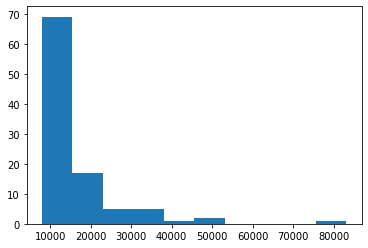

In [118]:
import matplotlib.pyplot as plt
from scipy.stats import zipf

x, y = list(zip(*freq.most_common(100)))
plt.hist(y)
#plt.plot(zipf.rvs(2, sum(y)))

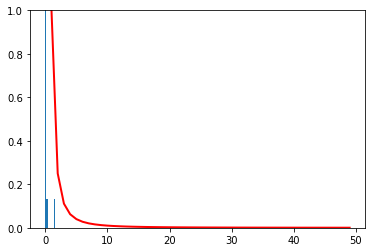

array([1.55054610e+00, 3.87636524e-01, 1.72282900e-01, 9.69091310e-02,
       6.20218439e-02, 4.30707249e-02, 3.16437979e-02, 2.42272828e-02,
       1.91425444e-02, 1.55054610e-02, 1.28144306e-02, 1.07676812e-02,
       9.17482897e-03, 7.91094947e-03, 6.89131599e-03, 6.05682069e-03,
       5.36521141e-03, 4.78563610e-03, 4.29514154e-03, 3.87636524e-03,
       3.51597754e-03, 3.20360764e-03, 2.93108903e-03, 2.69192031e-03,
       2.48087375e-03, 2.29370724e-03, 2.12694938e-03, 1.97773737e-03,
       1.84369334e-03, 1.72282900e-03, 1.61347148e-03, 1.51420517e-03,
       1.42382562e-03, 1.34130285e-03, 1.26575192e-03, 1.19640903e-03,
       1.13261220e-03, 1.07378539e-03, 1.01942544e-03, 9.69091310e-04,
       9.22395061e-04, 8.78994386e-04, 8.38586315e-04, 8.00901909e-04,
       7.65701776e-04, 7.32772257e-04, 7.01922181e-04, 6.72980077e-04,
       6.45791794e-04])

In [121]:
from scipy import special
import numpy as np

s = np.array(y)

#Calculate zipf and plot the data
a = 2. #  distribution parameter
count, bins, ignored = plt.hist(s[s<50], 50, density=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.ylim((0.0,1.0))
plt.show()
y